# **Heart failure prediction**


## **ABOUT DATA**

This dataset encompasses a variety of factors that can influence the occurrence of a Death Event (DE). It contains personal information about individuals, including their age, sex, blood pressure, smoking habits, presence of diabetes, ejection fraction (a measure of heart function), creatinine phosphokinase levels (an enzyme found in the heart), serum creatinine levels (a marker of kidney function), serum sodium levels, and the amount of time that has passed since the data was recorded. The primary goal is to use this dataset to develop predictive models that can anticipate whether or not an individual will experience a Death Event.

To elaborate further, this dataset is a valuable resource for medical and healthcare research. It compiles a range of factors that are known to be associated with the occurrence of Death Events, which are critical events in the context of healthcare, particularly for individuals with heart conditions. Here's a breakdown of the key factors in this dataset:

1. **Age**: Age is a fundamental factor in assessing an individual's risk of experiencing a Death Event. Older individuals often face a higher risk.

2. **Sex**: Gender can also play a role in heart-related events. There may be differences in risk factors between males and females.

3. **Blood Pressure**: Elevated blood pressure is a well-known risk factor for heart problems. Monitoring blood pressure is crucial in assessing an individual's cardiovascular health.

4. **Smoking**: Smoking is a major risk factor for heart disease. Whether an individual smokes or not can significantly impact their risk of experiencing a Death Event.

5. **Diabetes**: Diabetes is closely linked to heart issues. Individuals with diabetes are often at a higher risk of cardiovascular complications.

6. **Ejection Fraction**: This measure indicates how effectively the heart is pumping blood. A reduced ejection fraction can signal heart problems.

7. **Creatinine Phosphokinase**: Elevated levels of this enzyme in the blood can indicate heart muscle damage.

8. **Serum Creatinine**: Elevated levels may indicate kidney dysfunction, which can be related to heart health.

9. **Serum Sodium**: Imbalances in serum sodium levels can affect heart function and overall health.

10. **Time**: The dataset includes a time variable, which likely represents the duration of observation or follow-up for each individual. This is crucial for understanding how these factors evolve over time in relation to Death Events.

By analyzing and modeling these factors, researchers and healthcare professionals can gain insights into the risk factors associated with Death Events. Predictive models developed from this dataset can potentially help identify individuals who are at a higher risk of experiencing such events, allowing for earlier intervention and improved patient care.

In [7]:

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# **Import Libraries**

In [3]:
!pip install mlxtend

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 3.1 MB/s eta 0:00:0000:0100:01


In [9]:
import matplotlib.pyplot as plt
import warnings
import seaborn as sns
from colorama import Fore, Back, Style 
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score
from mlxtend.plotting import plot_confusion_matrix
from plotly.offline import plot, iplot, init_notebook_mode
import plotly.graph_objs as go
from plotly.subplots import make_subplots
import plotly.express as px
from statsmodels.formula.api import ols
import plotly.graph_objs as gobj

init_notebook_mode(connected=True)
warnings.filterwarnings("ignore")
import plotly.figure_factory as ff

%matplotlib inline

import xgboost
#import lightgbm
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from catboost import CatBoostClassifier

# **Lets Explore the data**

In [10]:
heart_data = pd.read_csv('heart_failure_clinical_records_dataset.csv')
heart_data.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


* Sex - Gender of patient Male = 1, Female =0
* Age - Age of patient
* Diabetes - 0 = No, 1 = Yes
* Anaemia - 0 = No, 1 = Yes
* High_blood_pressure - 0 = No, 1 = Yes
* Smoking - 0 = No, 1 = Yes
* DEATH_EVENT - 0 = No, 1 = Yes

# Is Age and Sex an indicator for Death Event?

In [11]:
# age distribution

hist_data =[heart_data["age"].values]
group_labels = ['age'] 

fig = ff.create_distplot(hist_data, group_labels)
fig.update_layout(title_text='Age Distribution plot')

fig.show()

* Age wise 40 to 80 the spread is High
* less than 40 age and higher than 80 age people are very low

In [12]:
fig = px.box(heart_data, x='sex', y='age', points="all")
fig.update_layout(
    title_text="Gender wise Age Spread - Male = 1 Female =0")
fig.show()

In [13]:
male = heart_data[heart_data["sex"]==1]
female = heart_data[heart_data["sex"]==0]

male_survi = male[heart_data["DEATH_EVENT"]==0]
male_not = male[heart_data["DEATH_EVENT"]==1]
female_survi = female[heart_data["DEATH_EVENT"]==0]
female_not = female[heart_data["DEATH_EVENT"]==1]

labels = ['Male - Survived','Male - Not Survived', "Female -  Survived", "Female - Not Survived"]
values = [len(male[heart_data["DEATH_EVENT"]==0]),len(male[heart_data["DEATH_EVENT"]==1]),
         len(female[heart_data["DEATH_EVENT"]==0]),len(female[heart_data["DEATH_EVENT"]==1])]
fig = go.Figure(data=[go.Pie(labels=labels, values=values, hole=.4)])
fig.update_layout(
    title_text="Analysis on Survival - Gender")
fig.show()

# Gender factor Analysis

In [14]:
surv = heart_data[heart_data["DEATH_EVENT"]==0]["age"]
not_surv = heart_data[heart_data["DEATH_EVENT"]==1]["age"]
hist_data = [surv,not_surv]
group_labels = ['Survived', 'Not Survived']
fig = ff.create_distplot(hist_data, group_labels, bin_size=0.5)
fig.update_layout(
    title_text="Analysis in Age on Survival Status")
fig.show()

* Survival is high on 40 to 70
* The spread of Not survival is going through all ages.

In [15]:
fig = px.violin(heart_data, y="age", x="sex", color="DEATH_EVENT", box=True, points="all", hover_data=heart_data.columns)
fig.update_layout(title_text="Analysis in Age and Gender on Survival Status")
fig.show()

Age Report

* Survival spread is high in age's flow of 40 to 70
* The Survival is high for both male between 50 to 60 and female's age between 60 to 70 respectively

In [16]:
fig = px.violin(heart_data, y="age", x="smoking", color="DEATH_EVENT", box=True, points="all", hover_data=heart_data.columns)
fig.update_layout(title_text="Analysis in Age and Smoking on Survival Status")
fig.show()

* The Survival is high for not smoking person 55 to 65, while for smoking person it is between 50 to 60
* Death event for smoking person is high than not smoking person

In [17]:
fig = px.violin(heart_data, y="age", x="diabetes", color="DEATH_EVENT", box=True, points="all", hover_data=heart_data.columns)
fig.update_layout(title_text="Analysis in Age and Diabetes on Survival Status")
fig.show()

# **Other Factors**

**Hist Plots**

In [18]:
fig = px.histogram(heart_data, x="creatinine_phosphokinase", color="DEATH_EVENT", marginal="violin", hover_data=heart_data.columns)
fig.show()

In [19]:
fig = px.histogram(heart_data, x="ejection_fraction", color="DEATH_EVENT", marginal="violin", hover_data=heart_data.columns)
fig.show()

In [20]:
fig = px.histogram(heart_data, x="platelets", color="DEATH_EVENT", marginal="violin", hover_data=heart_data.columns)
fig.show()

In [21]:
fig = px.histogram(heart_data, x="serum_creatinine", color="DEATH_EVENT", marginal="violin", hover_data=heart_data.columns)
fig.show()

In [22]:
fig = px.histogram(heart_data, x="serum_sodium", color="DEATH_EVENT", marginal="violin",hover_data=heart_data.columns)
fig.show()

**Distribution plots Survived and Not-Survived**

In [23]:
surv = heart_data[heart_data['DEATH_EVENT']==0]['serum_sodium']
not_surv = heart_data[heart_data['DEATH_EVENT']==1]['serum_sodium']
hist_data = [surv,not_surv]
group_labels = ['Survived', 'Not Survived']
fig = ff.create_distplot(hist_data, group_labels, bin_size=0.5)
fig.update_layout(
    title_text="Analysis in Serum Sodium on Survival Status")
fig.show()

In [24]:
surv = heart_data[heart_data['DEATH_EVENT']==0]['serum_creatinine']
not_surv = heart_data[heart_data['DEATH_EVENT']==1]['serum_creatinine']
hist_data = [surv,not_surv]
group_labels = ['Survived', 'Not Survived']
fig = ff.create_distplot(hist_data, group_labels, bin_size=0.5)
fig.update_layout(
    title_text="Analysis in Serum Creatinine on Survival Status")
fig.show()

In [25]:
surv = heart_data[heart_data['DEATH_EVENT']==0]['ejection_fraction']
not_surv = heart_data[heart_data['DEATH_EVENT']==1]['ejection_fraction']
hist_data = [surv,not_surv]
group_labels = ['Survived', 'Not Survived']
fig = ff.create_distplot(hist_data, group_labels, bin_size=0.5)
fig.update_layout(
    title_text="Analysis in Ejaction Fraction on Survival Status")
fig.show()

***Pie Charts***

In [26]:
labels = ['No Diabetes','Diabetes']
diabetes_yes = heart_data[heart_data['diabetes']==1]
diabetes_no = heart_data[heart_data['diabetes']==0]
values = [len(diabetes_no), len(diabetes_yes)]
fig = go.Figure(data=[go.Pie(labels=labels, values=values, hole=.4)])
fig.update_layout(
    title_text="Analysis on Diabetes")
fig.show()

From the above pie chart we can conclude that in our dataset 58.2% (174) pepole are No Diabetes Person and 41.8% (125) are Diabetes Person.

In [27]:
fig = px.pie(heart_data, values='diabetes',names='DEATH_EVENT', title='Diabetes Death Event Ratio')
fig.show()

In [21]:
diabetes_yes_survi = diabetes_yes[heart_data["DEATH_EVENT"]==0]
diabetes_yes_not_survi = diabetes_yes[heart_data["DEATH_EVENT"]==1]
diabetes_no_survi = diabetes_no[heart_data["DEATH_EVENT"]==0]
diabetes__no_not_survi = diabetes_no[heart_data["DEATH_EVENT"]==1]

labels = ['Diabetes Yes - Survived','Diabetes Yes - Not Survived', 'Diabetes NO - Survived', 'Diabetes NO - Not Survived']
values = [len(diabetes_yes[heart_data["DEATH_EVENT"]==0]),len(diabetes_yes[heart_data["DEATH_EVENT"]==1]),
         len(diabetes_no[heart_data["DEATH_EVENT"]==0]),len(diabetes_no[heart_data["DEATH_EVENT"]==1])]
fig = go.Figure(data=[go.Pie(labels=labels, values=values, hole=.4)])
fig.update_layout(
    title_text="Analysis on Survival - Diabetes")
fig.show()

* From above pie charts we can conclude that in our dataset diabetes from 174 of Non Diabetes person 118 are survived and 56 are not survived and
* From 125 Diabetes person 85 are survived, while 40 are not survived.

In [28]:
anaemia_yes = heart_data[heart_data['anaemia']==1]
anaemia_no = heart_data[heart_data['anaemia']==0]

labels = ['No Anaemia', 'Anaemia']
values = [len(anaemia_no), len(anaemia_yes)]
fig = go.Figure(data=[go.Pie(labels=labels, values=values, hole=.4)])
fig.update_layout(
    title_text="Analysis on - Anaemia")
fig.show()

From the above pie chart we can conclude that in our dataset 56.9%(170) pepoles are Non anaemic pepoles, while 43.1%(129) are anaemic pepoles.

In [29]:
fig = px.pie(heart_data, values='anaemia',names='DEATH_EVENT', title='Anaemia Death Event Ration')
fig.show()

In [30]:
anaemia_yes_survi = anaemia_yes[heart_data["DEATH_EVENT"]==0]
anaemia_yes_not_survi = anaemia_yes[heart_data["DEATH_EVENT"]==1]
anaemia_no_survi = anaemia_no[heart_data["DEATH_EVENT"]==0]
anaemia_no_not_survi = anaemia_no[heart_data["DEATH_EVENT"]==1]

labels = ['Anaemia Yes - Survived','Anaemia Yes - Not Survived', 'Anaemia No - Survived', 'Anaemia NO - Not Survived']
values = [len(anaemia_yes[heart_data["DEATH_EVENT"]==0]),len(anaemia_yes[heart_data["DEATH_EVENT"]==1]),
         len(anaemia_no[heart_data["DEATH_EVENT"]==0]),len(anaemia_no[heart_data["DEATH_EVENT"]==1])]
fig = go.Figure(data=[go.Pie(labels=labels, values=values, hole=.4)])
fig.update_layout(
    title_text="Analysis on Survival - Anaemia")
fig.show()

* From above pie charts we can conclude that in our dataset diabetes from 170 of Non Anaemic person 120 are survived and 50 are not survived and
* From 129 Anaemic person 83 are survived, while 46 are not survived.

In [31]:
hbp_yes = heart_data[heart_data['high_blood_pressure']==1]
hbp_no = heart_data[heart_data['high_blood_pressure']==0]

labels = ["No High BP","High BP"]
values = [len(hbp_no), len(hbp_yes)]

fig = go.Figure(data=[go.Pie(labels=labels, values=values, hole=.4)])
fig.update_layout(
    title_text="Analysis on - High Blood Pressure")
fig.show()

From the above pie chart we can conclude that in our dataset 64.9%(194) pepoles are Non High BP pepoles, while 35.1%(105) are High BP pepoles.

In [32]:
fig = px.pie(heart_data, values='high_blood_pressure',names='DEATH_EVENT', title='High Blood Pressure Death Event Ratio')
fig.show()

In [33]:
hbp_yes_survi = hbp_yes[heart_data["DEATH_EVENT"]==0]
hbp_yes_not_survi = hbp_yes[heart_data["DEATH_EVENT"]==1]
hbp_no_survi = hbp_no[heart_data["DEATH_EVENT"]==0]
hbp_no_not_survi = hbp_no[heart_data["DEATH_EVENT"]==1]

labels = ['HBP Yes - Survived','HBP Yes - Not Survived', 'HBP No - Survived', 'HBP NO - Not Survived']
values = [len(hbp_yes[heart_data["DEATH_EVENT"]==0]),len(hbp_yes[heart_data["DEATH_EVENT"]==1]),
         len(hbp_no[heart_data["DEATH_EVENT"]==0]),len(hbp_no[heart_data["DEATH_EVENT"]==1])]
fig = go.Figure(data=[go.Pie(labels=labels, values=values, hole=.4)])
fig.update_layout(
    title_text="Analysis on Survival - HBP(high blood pressure)")
fig.show()

* From above pie charts we can conclude that in our dataset diabetes from 194 of Non High BP person 137 are survived and 57 are not survived and
* From 105 High BP person 66 are survived, while 39 are not survived.

In [34]:
smoking_yes = heart_data[heart_data['smoking']==1]
smoking_no = heart_data[heart_data['smoking']==0]

labels = ['No Smoking','Smoking']
values = [len(smoking_no), len(smoking_yes)]

fig = go.Figure(data=[go.Pie(labels=labels, values=values, hole=.4)])
fig.update_layout(
    title_text="Analysis on - Smoking")
fig.show()

From the above pie chart we can conclude that in our dataset 67.9%(203) pepoles are Non Smoking pepoles, while 32.1%(96) are Smoking pepoles.

In [35]:
fig = px.pie(heart_data, values='smoking',names='DEATH_EVENT', title='Smoking Death Event Ratio')
fig.show()

In [36]:
smoking_yes_survi = smoking_yes[heart_data["DEATH_EVENT"]==0]
smoking_yes_not_survi = smoking_yes[heart_data["DEATH_EVENT"]==1]
smoking_no_survi = smoking_no[heart_data["DEATH_EVENT"]==0]
smoking_no_not_survi = smoking_no[heart_data["DEATH_EVENT"]==1]

labels = ['Smoking Yes - Survived','Smoking Yes - Not Survived', 'Smoking No - Survived', 'Smoking NO- Not Survived']
values = [len(smoking_yes[heart_data["DEATH_EVENT"]==0]),len(smoking_yes[heart_data["DEATH_EVENT"]==1]),
         len(smoking_no[heart_data["DEATH_EVENT"]==0]),len(smoking_no[heart_data["DEATH_EVENT"]==1])]
fig = go.Figure(data=[go.Pie(labels=labels, values=values, hole=.4)])
fig.update_layout(
    title_text="Analysis on Survival - Smoking")
fig.show()

* From above pie charts we can conclude that in our dataset diabetes from 203 of Non Smoking person 137 are survived and 66 are not survived and
* From 96 Smoking person 66 are survived, while 30 are not survived.

**Heatmap**

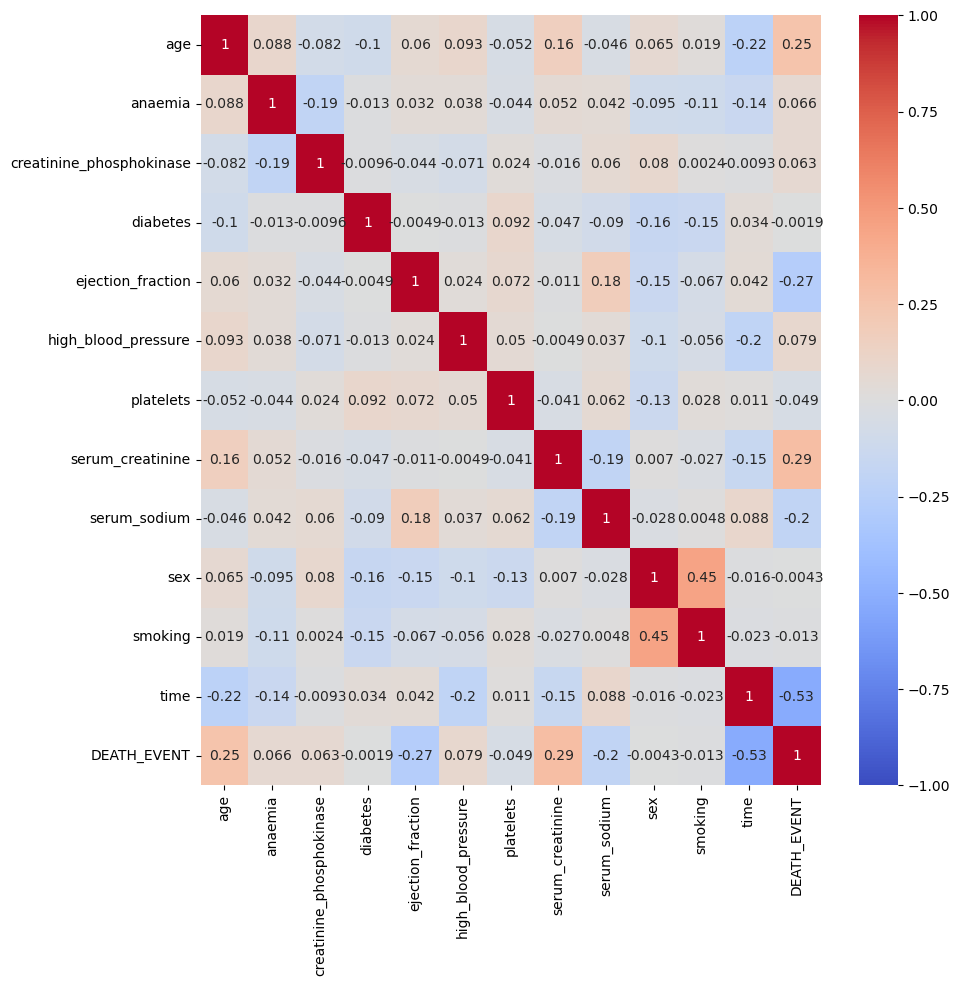

In [37]:
plt.figure(figsize=(10,10))
sns.heatmap(heart_data.corr(), vmin=-1, cmap='coolwarm', annot=True);

# **Data Modeling**

**Train Test Split**

In [38]:
Features = ['time','ejection_fraction','serum_creatinine']
x = heart_data[Features]
y = heart_data["DEATH_EVENT"]
x_train,x_test,y_train,y_test = train_test_split(x,y, test_size=0.2, random_state=2)

In [40]:
accuracy_list = []

**Logistic Regression**

In [41]:
# logistic regression

log_reg = LogisticRegression()
log_reg.fit(x_train, y_train)
log_reg_pred = log_reg.predict(x_test)
log_reg_acc = accuracy_score(y_test, log_reg_pred)
accuracy_list.append(100*log_reg_acc)

In [42]:
print(Fore.GREEN + "Accuracy of Logistic Regression is : ", "{:.2f}%".format(100* log_reg_acc))

Accuracy of Logistic Regression is :  90.00%


<Figure size 640x480 with 0 Axes>

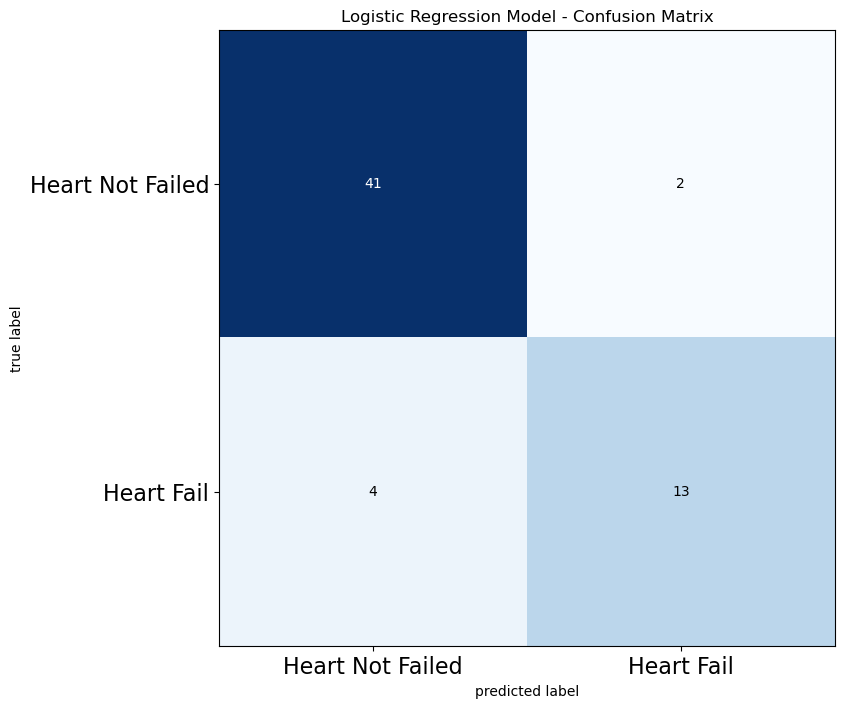

In [43]:
cm = confusion_matrix(y_test, log_reg_pred)
plt.figure()
plot_confusion_matrix(cm, figsize=(12,8), hide_ticks=True, cmap=plt.cm.Blues)
plt.title("Logistic Regression Model - Confusion Matrix")
plt.xticks(range(2), ["Heart Not Failed","Heart Fail"], fontsize=16)
plt.yticks(range(2), ["Heart Not Failed","Heart Fail"], fontsize=16)
plt.show()

**Support Vector**

In [44]:
# svc

sv_clf = SVC()
sv_clf.fit(x_train, y_train)
sv_clf_pred = sv_clf.predict(x_test)
sv_clf_acc = accuracy_score(y_test, sv_clf_pred)
accuracy_list.append(100* sv_clf_acc)

In [45]:
print(Fore.GREEN + "Accuracy of SVC is : ", "{:.2f}%".format(100* sv_clf_acc))

Accuracy of SVC is :  90.00%


<Figure size 640x480 with 0 Axes>

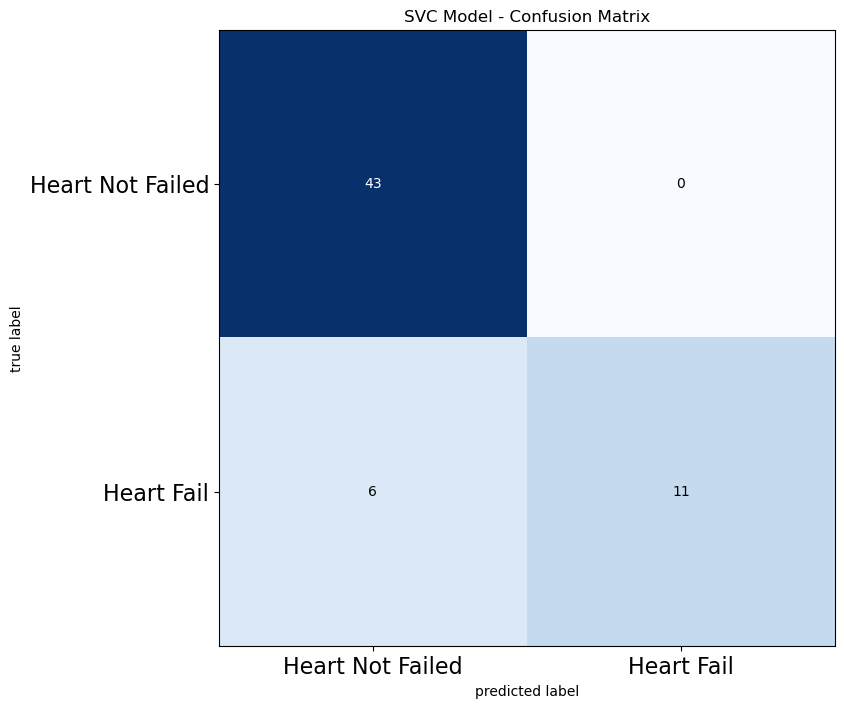

In [46]:
cm = confusion_matrix(y_test, sv_clf_pred)
plt.figure()
plot_confusion_matrix(cm, figsize=(12,8), hide_ticks=True, cmap=plt.cm.Blues)
plt.title("SVC Model - Confusion Matrix")
plt.xticks(range(2), ["Heart Not Failed","Heart Fail"], fontsize=16)
plt.yticks(range(2), ["Heart Not Failed","Heart Fail"], fontsize=16)
plt.show()

**K Neighbors Classifier**

In [47]:
# K Neighbors Classifier

kn_clf = KNeighborsClassifier(n_neighbors=6)
kn_clf.fit(x_train, y_train)
kn_pred = kn_clf.predict(x_test)
kn_acc = accuracy_score(y_test, kn_pred)
accuracy_list.append(100*kn_acc)

In [48]:
print(Fore.GREEN + "Accuracy of K Neighbors Classifier is : ", "{:.2f}%".format(100* kn_acc))

Accuracy of K Neighbors Classifier is :  91.67%


<Figure size 640x480 with 0 Axes>

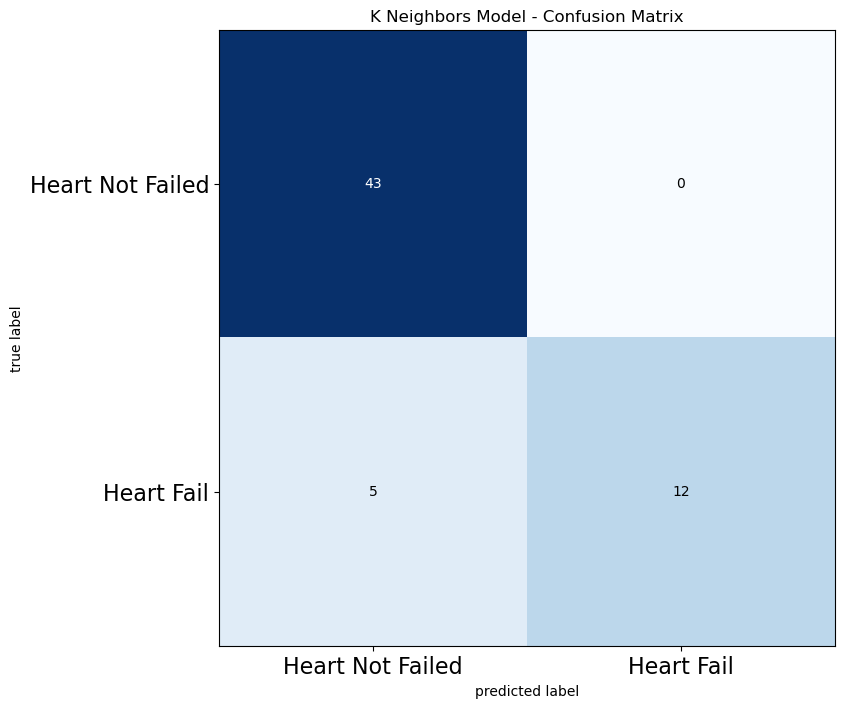

In [49]:
cm = confusion_matrix(y_test, kn_pred)
plt.figure()
plot_confusion_matrix(cm, figsize=(12,8), hide_ticks=True, cmap=plt.cm.Blues)
plt.title("K Neighbors Model - Confusion Matrix")
plt.xticks(range(2), ["Heart Not Failed","Heart Fail"], fontsize=16)
plt.yticks(range(2), ["Heart Not Failed","Heart Fail"], fontsize=16)
plt.show()

**Decision Tree Classifier**

In [50]:
# Decision Tree Classifier

dt_clf = DecisionTreeClassifier(max_leaf_nodes=3, random_state=0, criterion='entropy')
dt_clf.fit(x_train, y_train)
dt_pred = dt_clf.predict(x_test)
dt_acc = accuracy_score(y_test, dt_pred)
accuracy_list.append(100*dt_acc)

In [51]:
print(Fore.GREEN + "Accuracy of Decision Tree Classifier is : ", "{:.2f}%".format(100* dt_acc))

Accuracy of Decision Tree Classifier is :  90.00%


<Figure size 640x480 with 0 Axes>

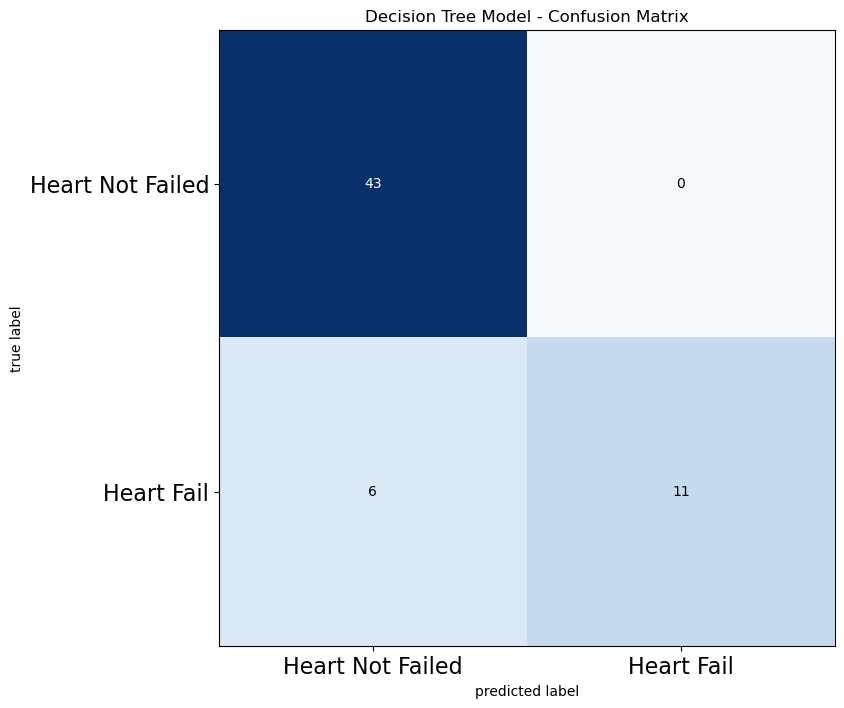

In [52]:
cm = confusion_matrix(y_test, dt_pred)
plt.figure()
plot_confusion_matrix(cm, figsize=(12,8), hide_ticks=True, cmap=plt.cm.Blues)
plt.title("Decision Tree Model - Confusion Matrix")
plt.xticks(range(2), ["Heart Not Failed","Heart Fail"], fontsize=16)
plt.yticks(range(2), ["Heart Not Failed","Heart Fail"], fontsize=16)
plt.show()

**Random Forest Classifier**

In [53]:
# RandomForestClassifier

r_clf = RandomForestClassifier(max_features=0.5, max_depth=15, random_state=1)
r_clf.fit(x_train, y_train)
r_pred = r_clf.predict(x_test)
r_acc = accuracy_score(y_test, r_pred)
accuracy_list.append(100*r_acc)

In [54]:
print(Fore.GREEN + "Accuracy of Random Forest Classifier is : ", "{:.2f}%".format(100* r_acc))

Accuracy of Random Forest Classifier is :  90.00%


<Figure size 640x480 with 0 Axes>

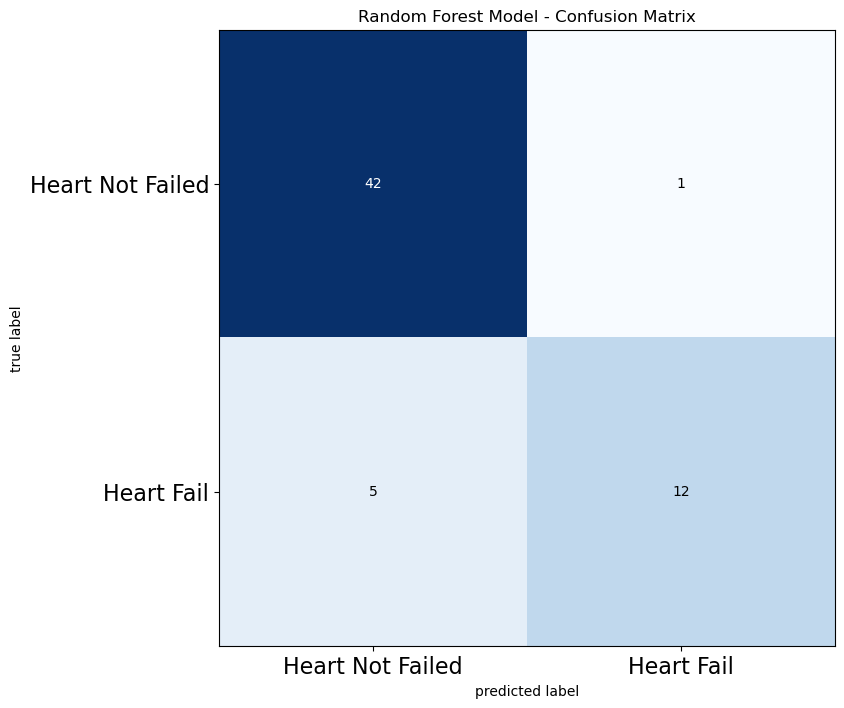

In [55]:
cm = confusion_matrix(y_test, r_pred)
plt.figure()
plot_confusion_matrix(cm, figsize=(12,8), hide_ticks=True, cmap=plt.cm.Blues)
plt.title("Random Forest Model - Confusion Matrix")
plt.xticks(range(2), ["Heart Not Failed","Heart Fail"], fontsize=16)
plt.yticks(range(2), ["Heart Not Failed","Heart Fail"], fontsize=16)
plt.show()

**Gradient Boosting Classifier**

In [56]:
# GradientBoostingClassifier

gradientboost_clf = GradientBoostingClassifier(max_depth=2, random_state=1)
gradientboost_clf.fit(x_train,y_train)
gradientboost_pred = gradientboost_clf.predict(x_test)
gradientboost_acc = accuracy_score(y_test, gradientboost_pred)
accuracy_list.append(100*gradientboost_acc)

In [57]:
print(Fore.GREEN + "Accuracy of Gradient Boosting is : ", "{:.2f}%".format(100* gradientboost_acc))

Accuracy of Gradient Boosting is :  93.33%


<Figure size 640x480 with 0 Axes>

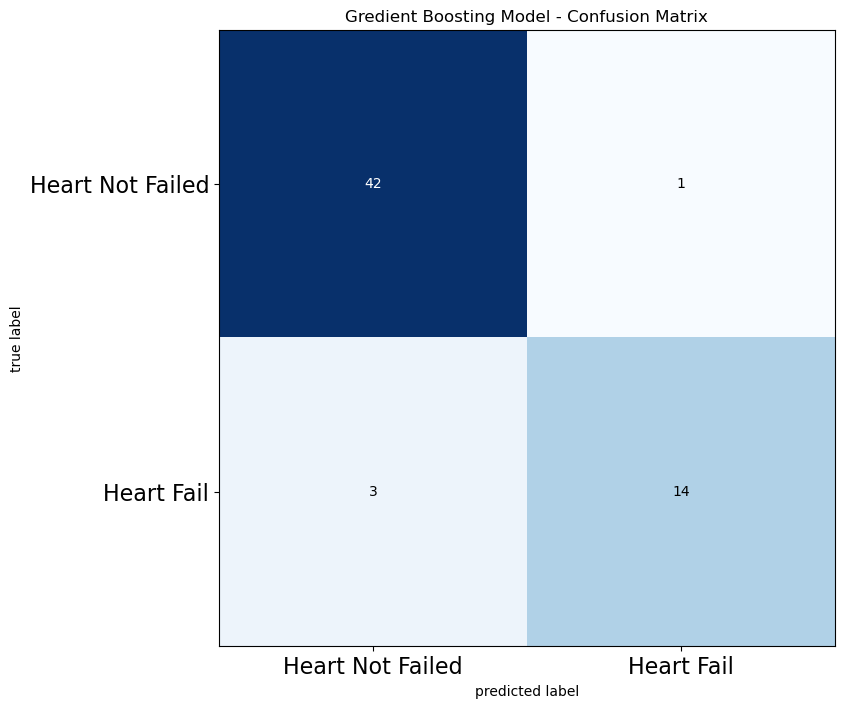

In [58]:
cm = confusion_matrix(y_test, gradientboost_pred)
plt.figure()
plot_confusion_matrix(cm, figsize=(12,8), hide_ticks=True, cmap=plt.cm.Blues)
plt.title("Gredient Boosting Model - Confusion Matrix")
plt.xticks(range(2), ["Heart Not Failed","Heart Fail"], fontsize=16)
plt.yticks(range(2), ["Heart Not Failed","Heart Fail"], fontsize=16)
plt.show()

**xgbrf classifier**

In [59]:
# xgbrf classifier

xgb_clf = xgboost.XGBRFClassifier(max_depth=3, random_state=1)
xgb_clf.fit(x_train,y_train)
xgb_pred = xgb_clf.predict(x_test)
xgb_acc = accuracy_score(y_test, xgb_pred)
accuracy_list.append(100*xgb_acc)

In [60]:
print(Fore.GREEN + "Accuracy of XGBRFClassifier is : ", "{:.2f}%".format(100* xgb_acc))

Accuracy of XGBRFClassifier is :  93.33%


<Figure size 640x480 with 0 Axes>

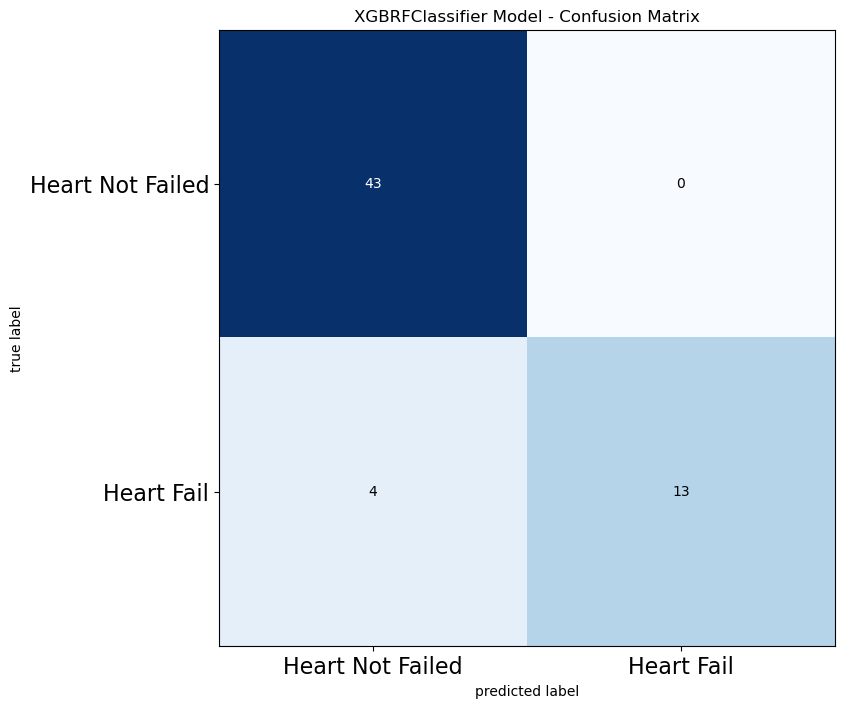

In [61]:
cm = confusion_matrix(y_test, xgb_pred)
plt.figure()
plot_confusion_matrix(cm, figsize=(12,8), hide_ticks=True, cmap=plt.cm.Blues)
plt.title("XGBRFClassifier Model - Confusion Matrix")
plt.xticks(range(2), ["Heart Not Failed","Heart Fail"], fontsize=16)
plt.yticks(range(2), ["Heart Not Failed","Heart Fail"], fontsize=16)
plt.show()

**Cat Boost Classifier**

In [63]:
# CatBoostClassifier

cat_clf = CatBoostClassifier()
cat_clf.fit(x_train,y_train)
cat_pred = cat_clf.predict(x_test)
cat_acc = accuracy_score(y_test, cat_pred)
accuracy_list.append(100*cat_acc)

Learning rate set to 0.005591
0:	learn: 0.6898088	total: 62.6ms	remaining: 1m 2s
1:	learn: 0.6853690	total: 63.3ms	remaining: 31.6s
2:	learn: 0.6814224	total: 64ms	remaining: 21.3s
3:	learn: 0.6763787	total: 64.6ms	remaining: 16.1s
4:	learn: 0.6732323	total: 65.1ms	remaining: 13s
5:	learn: 0.6693704	total: 65.8ms	remaining: 10.9s
6:	learn: 0.6649136	total: 66.6ms	remaining: 9.44s
7:	learn: 0.6609337	total: 67.3ms	remaining: 8.34s
8:	learn: 0.6571249	total: 68ms	remaining: 7.49s
9:	learn: 0.6521269	total: 68.8ms	remaining: 6.81s
10:	learn: 0.6485155	total: 69.2ms	remaining: 6.22s
11:	learn: 0.6440567	total: 69.8ms	remaining: 5.75s
12:	learn: 0.6409555	total: 70.4ms	remaining: 5.35s
13:	learn: 0.6370791	total: 71ms	remaining: 5s
14:	learn: 0.6329117	total: 71.6ms	remaining: 4.7s
15:	learn: 0.6288987	total: 72ms	remaining: 4.43s
16:	learn: 0.6246823	total: 72.7ms	remaining: 4.2s
17:	learn: 0.6210249	total: 73.6ms	remaining: 4.01s
18:	learn: 0.6177115	total: 74.5ms	remaining: 3.85s
19:	lea

251:	learn: 0.3143283	total: 187ms	remaining: 554ms
252:	learn: 0.3141700	total: 187ms	remaining: 552ms
253:	learn: 0.3137297	total: 187ms	remaining: 551ms
254:	learn: 0.3134737	total: 188ms	remaining: 549ms
255:	learn: 0.3129160	total: 188ms	remaining: 547ms
256:	learn: 0.3125900	total: 189ms	remaining: 546ms
257:	learn: 0.3122910	total: 189ms	remaining: 544ms
258:	learn: 0.3118644	total: 190ms	remaining: 542ms
259:	learn: 0.3116776	total: 190ms	remaining: 541ms
260:	learn: 0.3111175	total: 191ms	remaining: 540ms
261:	learn: 0.3105626	total: 191ms	remaining: 538ms
262:	learn: 0.3100185	total: 192ms	remaining: 537ms
263:	learn: 0.3096042	total: 192ms	remaining: 535ms
264:	learn: 0.3091813	total: 192ms	remaining: 533ms
265:	learn: 0.3087009	total: 193ms	remaining: 532ms
266:	learn: 0.3081483	total: 193ms	remaining: 530ms
267:	learn: 0.3078438	total: 194ms	remaining: 529ms
268:	learn: 0.3076115	total: 194ms	remaining: 528ms
269:	learn: 0.3072761	total: 195ms	remaining: 526ms
270:	learn: 

635:	learn: 0.2193918	total: 375ms	remaining: 215ms
636:	learn: 0.2190202	total: 376ms	remaining: 214ms
637:	learn: 0.2188899	total: 377ms	remaining: 214ms
638:	learn: 0.2187351	total: 377ms	remaining: 213ms
639:	learn: 0.2186771	total: 378ms	remaining: 212ms
640:	learn: 0.2186094	total: 378ms	remaining: 212ms
641:	learn: 0.2183919	total: 378ms	remaining: 211ms
642:	learn: 0.2181481	total: 379ms	remaining: 210ms
643:	learn: 0.2179622	total: 379ms	remaining: 210ms
644:	learn: 0.2177679	total: 380ms	remaining: 209ms
645:	learn: 0.2175550	total: 380ms	remaining: 208ms
646:	learn: 0.2172414	total: 381ms	remaining: 208ms
647:	learn: 0.2170534	total: 381ms	remaining: 207ms
648:	learn: 0.2169682	total: 382ms	remaining: 207ms
649:	learn: 0.2167602	total: 382ms	remaining: 206ms
650:	learn: 0.2165810	total: 383ms	remaining: 205ms
651:	learn: 0.2164050	total: 383ms	remaining: 205ms
652:	learn: 0.2161775	total: 384ms	remaining: 204ms
653:	learn: 0.2160228	total: 384ms	remaining: 203ms
654:	learn: 

In [64]:
print(Fore.GREEN + "Accuracy of CatBoostClassifier is : ","{:.2f}%".format(100* cat_acc))

Accuracy of CatBoostClassifier is :  91.67%


<Figure size 640x480 with 0 Axes>

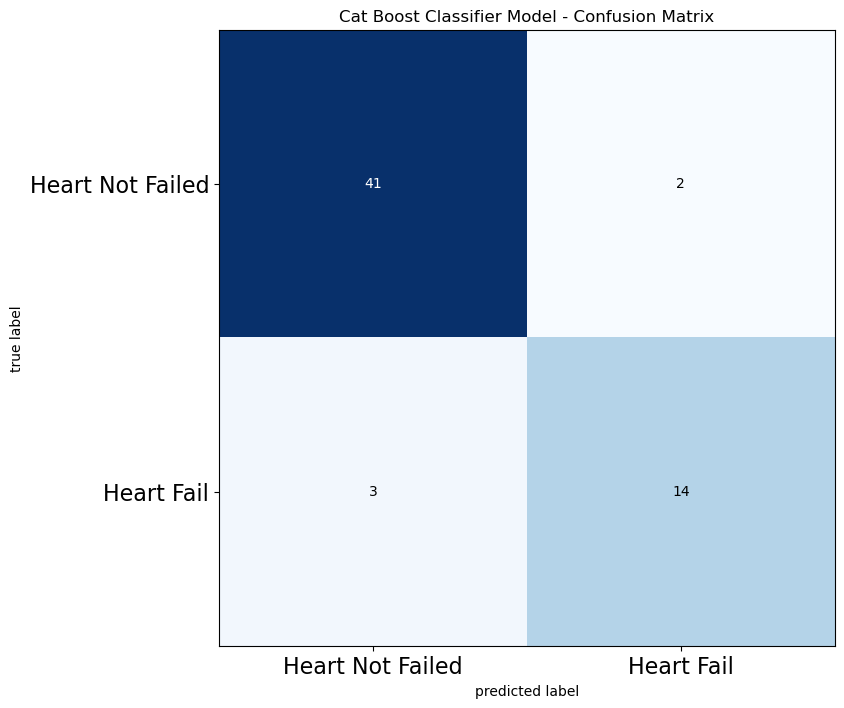

In [65]:
cm = confusion_matrix(y_test, cat_pred)
plt.figure()
plot_confusion_matrix(cm, figsize=(12,8), hide_ticks=True, cmap=plt.cm.Blues)
plt.title("Cat Boost Classifier Model - Confusion Matrix")
plt.xticks(range(2), ["Heart Not Failed","Heart Fail"], fontsize=16)
plt.yticks(range(2), ["Heart Not Failed","Heart Fail"], fontsize=16)
plt.show()

In [69]:
model_list = ['Logistic Regression', 'SVC','KNearestNeighbours', 'DecisionTree', 'RandomForest',
              'GradientBooster', 'XGBRF', 'CatBoostClassifier']

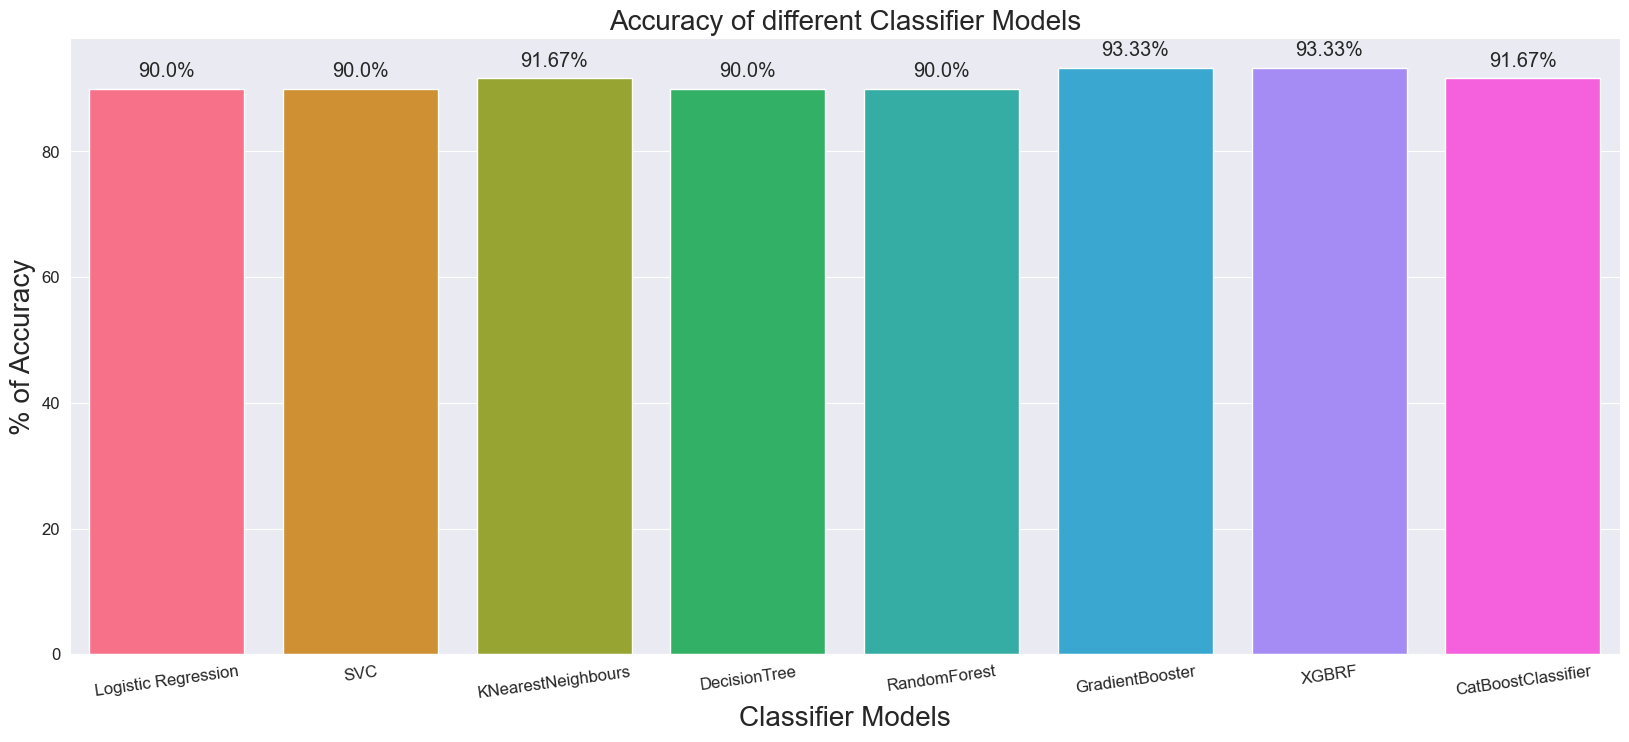

In [70]:
plt.rcParams['figure.figsize']=20,8
sns.set_style('darkgrid')
ax = sns.barplot(x=model_list, y=accuracy_list, palette = "husl", saturation =2.0)
plt.xlabel('Classifier Models', fontsize = 20 )
plt.ylabel('% of Accuracy', fontsize = 20)
plt.title('Accuracy of different Classifier Models', fontsize = 20)
plt.xticks(fontsize = 12, horizontalalignment = 'center', rotation = 8)
plt.yticks(fontsize = 12)
for i in ax.patches:
    width, height = i.get_width(), i.get_height()
    x, y = i.get_xy() 
    ax.annotate(f'{round(height,2)}%', (x + width/2, y + height*1.02), ha='center', fontsize = 'x-large')
plt.show()

* Gradient Booster Classifier: 93.33%
* XGBRFClassifier: 93.33%
* KNeighborsClassifier: 91.67%
* Cat Boost Classifier: 91.67%
* Random Forest Classifier: 90.00%
* DecisionTreeClassifier: 90.00%
* SVC: 90.00%
* Logistic Regression: 90.00%